# setting

In [61]:
import sys, os
home_path = os.path.expanduser("~")
sys.path.append(home_path + '/Desktop/Elo_kaggle/py/models/')
sys.path.append(home_path + '/.pyenv/versions/3.6.5/lib/python3.6/site-packages/xgboost-0.81-py3.6.egg')

# module

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing
import feather # fast reading data
from datetime import datetime
from sklearn.metrics import mean_squared_error
import Regressor, Ensemble
import GradientBoosting as gb
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
import importlib
importlib.reload(Regressor)
importlib.reload(Ensemble)
importlib.reload(gb)

<module 'GradientBoosting' from '/Users/takutokotsubo/Desktop/Elo_kaggle/py/models/GradientBoosting.py'>

# function

In [28]:
def read_data(train_name,test_name,features_name):
    #Loading Train and Test Data
    Base = home_path + "/Desktop/Elo_kaggle/input/processed/"
    train = feather.read_dataframe(Base + train_name + ".feather")
    test = feather.read_dataframe(Base + test_name + ".feather")
    features = feather.read_dataframe(Base + features_name + ".feather")
    # check data frame
    print("{} observations and {} features in train set.".format(train.shape[0],train.shape[1]))
    print("{} observations and {} features in test set.".format(test.shape[0],test.shape[1]))
    print("{} observations and {} features in features set.".format(features.shape[0],features.shape[1]))
    # transform
    target = train['target']; del train['target'] # data set
    features = features["feature"].tolist() # features list
    return train, test, features, target
def submit(predict,tech):
    # make submit file
    submit_file = feather.read_dataframe(home_path + "/Desktop/Elo_kaggle/input/feather/sample_submission.feather")
    submit_file["target"] = predict
    # save for output/(technic name + datetime + .csv)
    file_name = home_path + '/Desktop/Elo_kaggle/output/' + tech + datetime.now().strftime("%Y%m%d") + ".csv"
    submit_file.to_csv(file_name, index=False)

# Read data

In [ ]:
# read file
train_name = "train_20181223"; test_name = "test_20181223"; features_name = "features_20181223";
train, test, features, target = read_data(train_name,test_name,features_name)

# Regession model

In [18]:
# Ridge regression
clf = Ridge(alpha=100)
val_pred_ridge, test_pred_ridge = Regressor.Regressors(clf,train,test,features,target) 
# Lasso regression
clf = Lasso(alpha=100)
val_pred_lasso, test_pred_lasso = Regressor.Regressors(clf,train,test,features,target) 
# Ensemble regression (bagging)
clf = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, max_samples=0.3)
val_pred_bag, test_pred_bag = Regressor.Regressors(clf,train,test,features,target) 

201917 observations and 121 features in train set.
123623 observations and 119 features in test set.
118 observations and 1 features in features set.
fold n°1
fold n°2
fold n°3
fold n°4
fold n°5
fold n°1
fold n°2
fold n°3
fold n°4
fold n°5
fold n°1
fold n°2
fold n°3
fold n°4
fold n°5


In [19]:
# print validation RMSE 
print("Ridge regression validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_ridge)))
print("Lasso regression validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_lasso)))
print("Bagging regression validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_bag)))  

Ridge regression validation RMSE: 4.7343
Lasso regression validation RMSE: 4.7343
Bagging regression validation RMSE: 4.7343


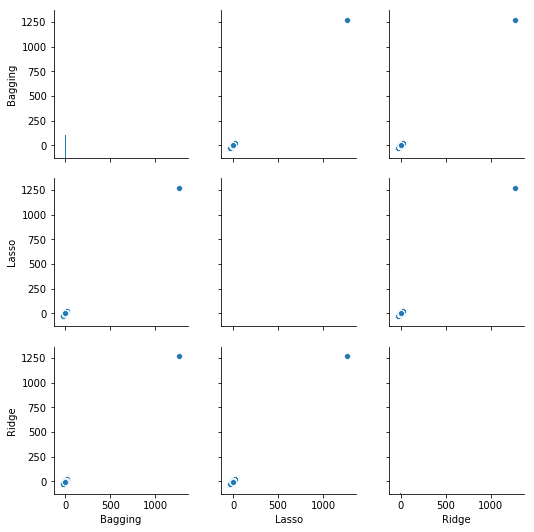

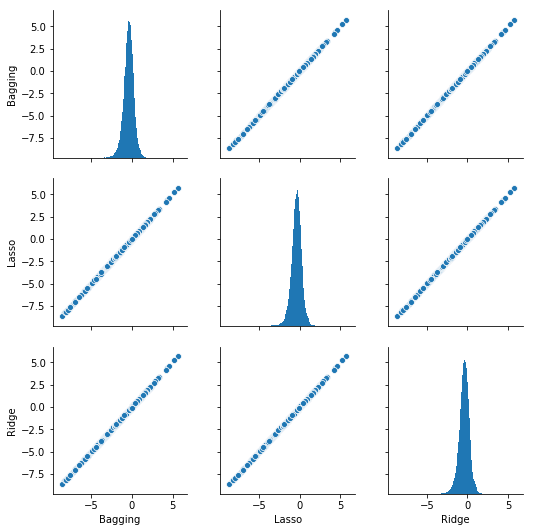

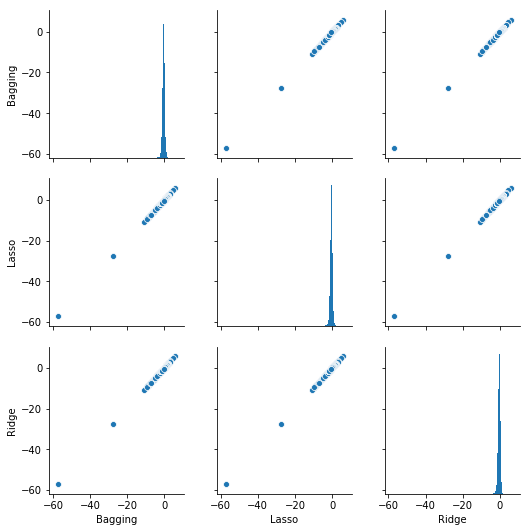

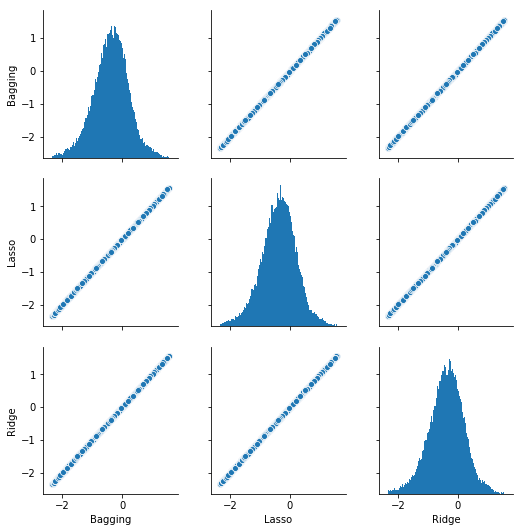

In [23]:
# set data frame
df_val = pd.DataFrame({'Ridge':val_pred_ridge, 'Lasso':val_pred_lasso, "Bagging" : val_pred_bag})
df_test = pd.DataFrame({'Ridge':test_pred_ridge, 'Lasso':test_pred_lasso, "Bagging" : test_pred_bag})
# plot validation data set 
sns.pairplot(df_val,diag_kws={'bins': 500}) # all values
sns.pairplot(df_val[df_val.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)],
             diag_kws={'bins': 500}) # non outliers
# plot test data set 
sns.pairplot(df_test,diag_kws={'bins': 500}) # all values
sns.pairplot(df_test[df_test.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)],
             diag_kws={'bins': 500}) # non outliers

In [12]:
# submit file
#submit(test_pred_ridge,"Ridge")
#submit(test_pred_lasso,"Lasso")
submit(test_pred_bag,"Bagging")

# Gradient Boosting method

## Light GBM

In [46]:
# parameters
param_set = {'num_leaves': 31,
             'min_data_in_leaf': 30, 
             'objective':'regression',
             'max_depth': -1,
             'learning_rate': 0.01,
             "min_child_samples": 20,
             "boosting": "gbdt",
             "feature_fraction": 0.9,
             "bagging_freq": 1,
             "bagging_fraction": 0.9 ,
             "bagging_seed": 11,
             "metric": 'rmse',
             "lambda_l1": 0.1,
             "verbosity": -1,
             "nthread": 4,
             "random_state": 831}

In [51]:
val_pred_lgb, test_pred_lgb, model = gb.Regressors(gb.Lightgbm_Regressor,param_set,train,test,features,target,folds=5)

fold n°1
Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 3.72823	valid_1's rmse: 3.76412
[200]	training's rmse: 3.6615	valid_1's rmse: 3.73158
[300]	training's rmse: 3.61503	valid_1's rmse: 3.71533
[400]	training's rmse: 3.58175	valid_1's rmse: 3.70718
[500]	training's rmse: 3.55434	valid_1's rmse: 3.70102
[600]	training's rmse: 3.52986	valid_1's rmse: 3.69745
[700]	training's rmse: 3.51024	valid_1's rmse: 3.69553
[800]	training's rmse: 3.49167	valid_1's rmse: 3.69409
[900]	training's rmse: 3.47517	valid_1's rmse: 3.6933
[1000]	training's rmse: 3.45958	valid_1's rmse: 3.69247
[1100]	training's rmse: 3.44545	valid_1's rmse: 3.69196
[1200]	training's rmse: 3.43179	valid_1's rmse: 3.69168
[1300]	training's rmse: 3.41786	valid_1's rmse: 3.69163
[1400]	training's rmse: 3.40538	valid_1's rmse: 3.69134
[1500]	training's rmse: 3.39321	valid_1's rmse: 3.69101
[1600]	training's rmse: 3.38097	valid_1's rmse: 3.69113
[1700]	training's rmse: 3.36925	valid_1's r

In [52]:
# result
print("LIghtgbm validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_lgb)))
# submit
# submit(test_pred_lgb,"Lightgbm")

LIghtgbm validation RMSE: 3.6955


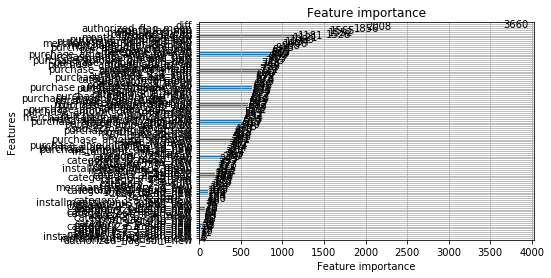

In [13]:
import lightgbm as lgb
lgb.plot_importance(model)

## Xgboost

In [53]:
# parameters
param_set = {'eta': 0.005, 
             'max_depth': 10, 
             'subsample': 0.8, 
             'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 
             'eval_metric': 'rmse', 
             'silent': True}

In [54]:
val_pred_xgb, test_pred_xgb, model = gb.Regressors(gb.Xgboost_Regressor,param_set,train,test,features,target,folds=5)

fold n°1
[0]	train-rmse:3.94923	valid-rmse:3.9513
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[100]	train-rmse:3.66902	valid-rmse:3.81999
[200]	train-rmse:3.48333	valid-rmse:3.76091
[300]	train-rmse:3.35288	valid-rmse:3.73352
[400]	train-rmse:3.25331	valid-rmse:3.71971
[500]	train-rmse:3.1647	valid-rmse:3.71115
[600]	train-rmse:3.09397	valid-rmse:3.70639
[700]	train-rmse:3.04066	valid-rmse:3.70355
[800]	train-rmse:2.99817	valid-rmse:3.70238
[900]	train-rmse:2.96099	valid-rmse:3.70144
[1000]	train-rmse:2.9292	valid-rmse:3.70107
[1100]	train-rmse:2.89925	valid-rmse:3.7004
[1200]	train-rmse:2.86968	valid-rmse:3.70028
[1300]	train-rmse:2.8401	valid-rmse:3.70007
[1400]	train-rmse:2.8117	valid-rmse:3.70001
[1500]	train-rmse:2.78453	valid-rmse:3.70025
Stopping. Best iteration:
[1386]	train-rmse:2.81552	valid-rmse:3.69989

fold n°2
[0]	train-rmse:3.94763	valid-rmse:3.95705
Multiple eval metric

In [55]:
# result
print("Xgboost validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_xgb)))
# submit
# submit(test_pred_xgb,"Xgboost")

Xgboost validation RMSE: 3.7002


# Ensemble

Ensemble.pyは作業が進み次第記入する.

In [56]:
# data set 
train_stack = np.vstack([val_pred_lgb, val_pred_xgb]).transpose()
test_stack = np.vstack([test_pred_lgb, test_pred_xgb]).transpose()

In [67]:
# Ridge regression
clf = Ridge(alpha=100)
val_pred_ensemble, test_pred_ensemble = Ensemble.Ensembles(clf,train_stack,test_stack,train,target) 

fold n°1
fold n°2
fold n°3
fold n°4
fold n°5


In [68]:
# result
print("Ensemble validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_ensemble)))
# submit
submit(test_pred_ensemble,"lgb-xgb-stack")

Ensemble validation RMSE: 3.6935
